In [1]:
import pandas as pd
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns


# READING DATA

In [3]:
# File path
fp = 'PatientData.zip'

# Open the zip file
with zipfile.ZipFile(fp, 'r') as z:
    # Print list of files in folder
    print(z.namelist())

    # Read CSV file
    with z.open('heart_statlog.csv') as f:
        # Load into DataFrame
        df = pd.read_csv(f)

# Show sample data
df.head()


['heart_statlog.csv']


age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

# DATA PREPROCESSING

In [5]:
# DataFrame shape (rows, cols)
print(df.shape)

(1190, 12)


In [6]:
# Rename columns
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 
              'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate', 
              'exercise_angina', 'oldpeak', 'ST_slope', 'MI']

df.head()

age  sex  chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
0   40    1                2         140          289                    0   
1   49    0                3         160          180                    0   
2   37    1                2         130          283                    0   
3   48    0                4         138          214                    0   
4   54    1                3         150          195                    0   

   resting_ecg  max_heart_rate  exercise_angina  oldpeak  ST_slope  MI  
0            0             172                0      0.0         1   0  
1            0             156                0      1.0         2   1  
2            1              98                0      0.0         1   0  
3            0             108                1      1.5         2   1  
4            0             122                0      0.0         1   0

In [7]:
# Converting catagorical columns
df['sex'] = df['sex'].astype('category')
df['chest_pain_type'] = df['chest_pain_type'].astype('category')
df['resting_ecg'] = df['resting_ecg'].astype('category')
df['exercise_angina'] = df['exercise_angina'].astype('category')
df['ST_slope'] = df['ST_slope'].astype('category')
df['MI'] = df['MI'].astype('category')

In [8]:
# Count of unique values
unique_values = df.nunique()
print(unique_values)

age                     50
sex                      2
chest_pain_type          4
resting_bp              67
cholesterol            222
fasting_blood_sugar      2
resting_ecg              3
max_heart_rate         119
exercise_angina          2
oldpeak                 53
ST_slope                 4
MI                       2
dtype: int64


In [9]:
# Data types
print(df.dtypes)

age                       int64
sex                    category
chest_pain_type        category
resting_bp                int64
cholesterol               int64
fasting_blood_sugar       int64
resting_ecg            category
max_heart_rate            int64
exercise_angina        category
oldpeak                 float64
ST_slope               category
MI                     category
dtype: object


In [10]:
# Stats summary
print("Dataframe Information: \n")
df.info()
print("\n\nDataframe Description:")
df.describe()

Dataframe Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   int64   
 1   sex                  1190 non-null   category
 2   chest_pain_type      1190 non-null   category
 3   resting_bp           1190 non-null   int64   
 4   cholesterol          1190 non-null   int64   
 5   fasting_blood_sugar  1190 non-null   int64   
 6   resting_ecg          1190 non-null   category
 7   max_heart_rate       1190 non-null   int64   
 8   exercise_angina      1190 non-null   category
 9   oldpeak              1190 non-null   float64 
 10  ST_slope             1190 non-null   category
 11  MI                   1190 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 63.8 KB


Dataframe Description:


age   resting_bp  cholesterol  fasting_blood_sugar  \
count  1190.000000  1190.000000  1190.000000          1190.000000   
mean     53.720168   132.153782   210.363866             0.213445   
std       9.358203    18.368823   101.420489             0.409912   
min      28.000000     0.000000     0.000000             0.000000   
25%      47.000000   120.000000   188.000000             0.000000   
50%      54.000000   130.000000   229.000000             0.000000   
75%      60.000000   140.000000   269.750000             0.000000   
max      77.000000   200.000000   603.000000             1.000000   

       max_heart_rate      oldpeak  
count     1190.000000  1190.000000  
mean       139.732773     0.922773  
std         25.517636     1.086337  
min         60.000000    -2.600000  
25%        121.000000     0.000000  
50%        140.500000     0.600000  
75%        160.000000     1.600000  
max        202.000000     6.200000

In [11]:
# Checking for null values
print(df.isnull().sum())

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
MI                     0
dtype: int64


In [12]:
# Checking for duplicate values
duplicates = df.duplicated()
df[duplicates]

age sex chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
163    49   0               2         110          208                    0   
604    58   1               3         150          219                    0   
887    63   1               1         145          233                    1   
888    67   1               4         160          286                    0   
889    67   1               4         120          229                    0   
...   ...  ..             ...         ...          ...                  ...   
1156   42   1               3         130          180                    0   
1157   61   1               4         140          207                    0   
1158   66   1               4         160          228                    0   
1159   46   1               4         140          311                    0   
1160   71   0               4         112          149                    0   

     resting_ecg  max_heart_rate exercise_angina  oldpeak ST_slope MI  
163            0             160               0      0.0        1  0  
604            1             118               1      0.0        2  1  
887            2             150               0      2.3        3  0  
888            2             108               1      1.5        2  1  
889            2             129               1      2.6        2  1  
...          ...             ...             ...      ...      ... ..  
1156           0             150               0      0.0        1  0  
1157           2             138               1      1.9        1  1  
1158           2             138               0      2.3        1  0  
1159           0             120               1      1.8        2  1  
1160           0             125               0      1.6        2  0  

[272 rows x 12 columns]

In [13]:
# Total duplicate rows
num_duplicates = df.duplicated().sum()


In [14]:
# Total number of rows before removing duplicates
initial_rows = len(df)
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates and keep the last occurrence
df = df.drop_duplicates(keep='last')

# Total number of rows after removing duplicates
final_rows = len(df)

# Calculate the number of removed rows
removed_rows = initial_rows - final_rows

# Calculate the number of rows that were kept
kept_rows = final_rows

print(f"Initial rows: {initial_rows}")
print(f"Total rows removed: {removed_rows}")
print(f"Total rows kept: {kept_rows}")


Number of duplicate rows: 272
Initial rows: 1190
Total rows removed: 272
Total rows kept: 918


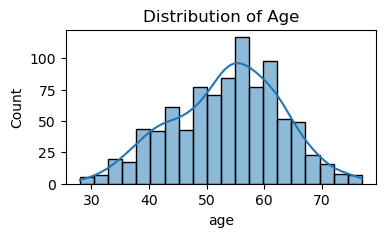

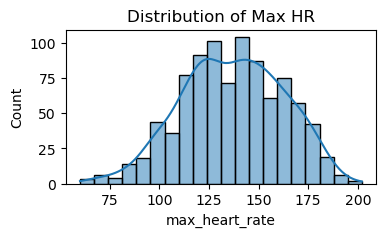

In [15]:
#Visualisation:

# Age distribution
plt.figure(figsize=(4, 2))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of Cholesterol
plt.figure(figsize=(4, 2))
sns.histplot(df['cholesterol'], bins=20, kde=True)
plt.title('Distribution of Cholesterol')
plt.show()

# Distribution of Resting bp
plt.figure(figsize=(4, 2))
sns.histplot(df['resting_bp'], bins=20, kde=True)
plt.title('Distribution of Resting BP')
plt.show()

# Distribution of Max HR
plt.figure(figsize=(4, 2))
sns.histplot(df['max_heart_rate'], bins=20, kde=True)
plt.title('Distribution of Max HR')
plt.show()

# Distribution of oldpeak
plt.figure(figsize=(4, 2))
sns.histplot(df['oldpeak'], bins=20, kde=True)
plt.title('Distribution of Oldpeak')
plt.show()



In [16]:
# Calculate mean Cholestrol
mean_cholesterol = df[df['cholesterol'] != 0]['cholesterol'].mean()
print(f"Mean Cholesterol: {mean_cholesterol}")


Mean Cholesterol: 244.6353887399464


In [17]:
# Replace 0 cholesterol values
df['cholesterol'] = df['cholesterol'].replace(0, mean_cholesterol)

In [18]:
# New distribution of Cholesterol
plt.figure(figsize=(4, 2))
sns.histplot(df['cholesterol'], bins=20, kde=True)
plt.title('New Distribution of Cholesterol')
plt.show()

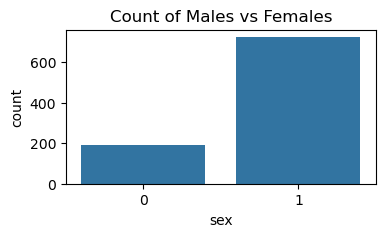

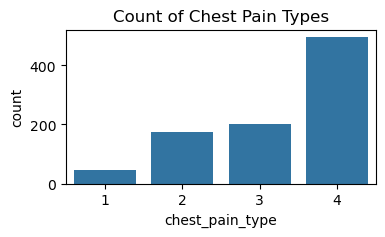

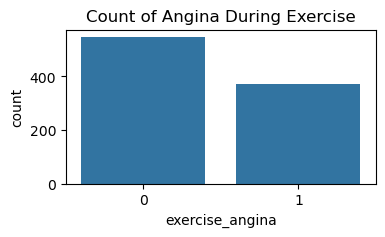

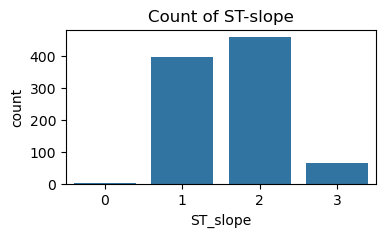

In [19]:
# Count plot for sex
plt.figure(figsize=(4, 2))
sns.countplot(x='sex', data=df)
plt.title('Count of Males vs Females')
plt.show()

# Count plot for chest pain type
plt.figure(figsize=(4, 2))
sns.countplot(x='chest_pain_type', data=df)
plt.title('Count of Chest Pain Types')
plt.show()

# Count plot for fasting blood sugar
plt.figure(figsize=(4, 2))
sns.countplot(x='fasting_blood_sugar', data=df)
plt.title('Count of Fasting blood sugar (> 120 mg/dl)')
plt.show()

# Count plot for resting ecg
plt.figure(figsize=(4, 2))
sns.countplot(x='resting_ecg', data=df)
plt.title('Count of Resting ECG (> 120 mg/dl)')
plt.show()

# Count plot for exercise angina
plt.figure(figsize=(4, 2))
sns.countplot(x='exercise_angina', data=df)
plt.title('Count of Angina During Exercise')
plt.show()

# Count plot for ST_slope
plt.figure(figsize=(4, 2))
sns.countplot(x='ST_slope', data=df)
plt.title('Count of ST-slope')
plt.show()



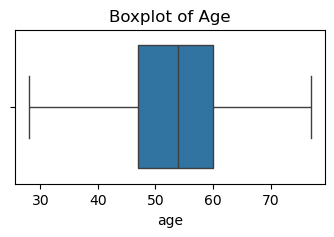

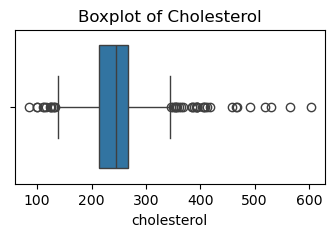

In [20]:
# Boxplot for age
plt.figure(figsize=(4, 2))
sns.boxplot(x='age', data=df)
plt.title('Boxplot of Age')
plt.show()

# Boxplot for cholesterol levels
plt.figure(figsize=(4, 2))
sns.boxplot(x='cholesterol', data=df)
plt.title('Boxplot of Cholesterol')
plt.show()


In [21]:
# Correlation heatmap
# Calculate
corr_matrix = df.corr(method='pearson')

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='mako', center=0, fmt='.2f')
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()


In [22]:
# Drop low corr columns
df.drop(['cholesterol', 'resting_ecg', 'fasting_blood_sugar'], axis=1, inplace=True)

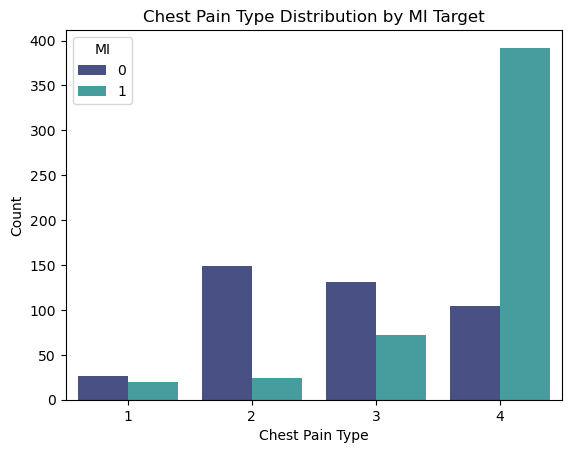

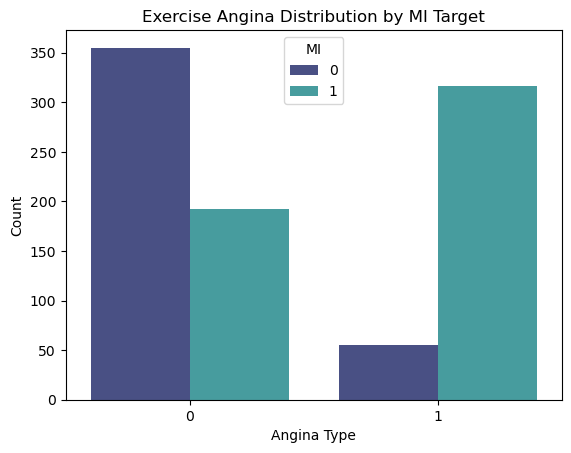

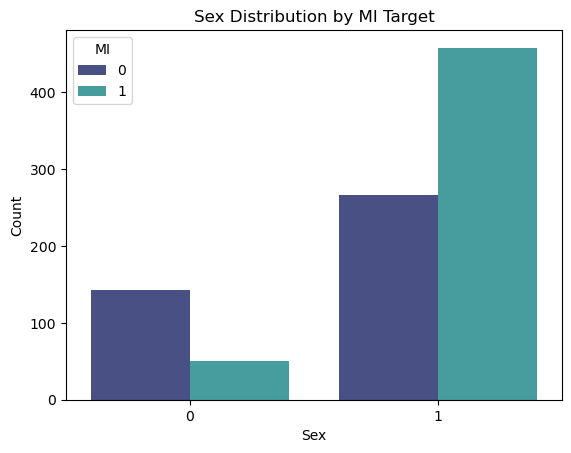

In [23]:
# Countplot with chest pain type grouped by target variable
sns.countplot(x='chest_pain_type', hue='MI', data=df, palette='mako')
plt.title('Chest Pain Type Distribution by MI Target')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Countplot with exercise angina grouped by target variable
sns.countplot(x='exercise_angina', hue='MI', data=df, palette='mako')
plt.title('Exercise Angina Distribution by MI Target')
plt.xlabel('Angina Type')
plt.ylabel('Count')
plt.show()

# Countplot with sex grouped by target variable
sns.countplot(x='sex', hue='MI', data=df, palette='mako')
plt.title('Sex Distribution by MI Target')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Countplot with ST-slope grouped by target variable
sns.countplot(x='ST_slope', hue='MI', data=df, palette='mako')
plt.title('ST-slope Distribution by MI Target')
plt.xlabel('Slope type')
plt.ylabel('Count')
plt.show()

In [24]:
# Outliers handling
def outliers_iqr(df, columns):
    outliers = pd.DataFrame()
    for column in columns:
        # Calculate IQR
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find outliers
        outliers_in_column = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers = pd.concat([outliers, outliers_in_column])

    
    return outliers.drop_duplicates()

# Apply the function to detect outliers for specific numerical columns
numerical_columns = ['age',  'resting_bp', 'max_heart_rate']
outliers = outliers_iqr(df, numerical_columns)

total_outliers = len(outliers)

# Print the outliers
print(outliers)
print("\nTotal: ", total_outliers)



      age sex chest_pain_type  resting_bp  max_heart_rate exercise_angina  \
109    39   1               2         190             106               0   
123    58   0               2         180             110               1   
190    53   1               4         180             120               1   
191    46   1               4         180             120               0   
242    54   1               4         200             142               1   
275    45   0               2         180             180               0   
276    59   1               3         180             100               0   
279    57   0               4         180             126               1   
315    53   1               4          80             141               1   
366    64   0               4         200             140               1   
373    63   1               4         185              98               1   
400    61   1               3         200              70               0   

In [25]:
# Iterative outlier removal
def rm_outliers(df, columns):
    total_removed = 0  # Count total outliers removed
    outliers = outliers_iqr(df, columns)
    
    # Keep removing outliers until none are found
    while not outliers.empty:
        total_removed += len(outliers)  # Add the number of outliers in this iteration
        df = df.drop(outliers.index)
        outliers = outliers_iqr(df, columns)
    
    print(f"Total outliers removed: {total_removed}")
    return df
    
df = rm_outliers(df, numerical_columns)

Total outliers removed: 30


In [26]:
# Apply the function to check outliers
numerical_columns = ['age', 'resting_bp', 'max_heart_rate']
outliers = outliers_iqr(df, numerical_columns)

total_outliers = len(outliers)

# Print the outliers
print("\nTotal: ", total_outliers)


Total:  0


# EXPORT PRE-PROCESSED DATASET

In [28]:
# Export the DataFrame to a CSV file
df.to_csv('heart_statlog_cleveland_hungary_final.csv', index=False)  # index=False removes the index column
print("Dataset exported successfully as 'heart_statlog_cleveland_hungary_final.csv'")

Dataset exported successfully as 'heart_statlog_cleveland_hungary_final.csv'


# TEST TRAIN VAL SPLIT

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Define X and y
X = df.drop(columns=['MI'])  # Drop the 'MI' column to get the features
y = df['MI']  # Set 'MI' column as the target variable

In [32]:
# First split: 85% Train + Validation, 15% Test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


In [33]:
# Second split: 76.5% Train, 23.5% Validation (from Train + Validation set)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.235, random_state=42)

In [34]:
# Print the sizes of the resulting splits
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 576
Validation set size: 178
Test set size: 134
